In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# Load the data
train_data = pd.read_csv('../data/raw/forest-cover-type-prediction-summer-2024/train.csv')
test_data = pd.read_csv('../data/raw/forest-cover-type-prediction-summer-2024/test.csv')

print(train_data.head())
print(train_data.info())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3031      38      8                               192   
1       2717      66     14                               384   
2       3172      24      9                               300   
3       3089      67      2                               285   
4       2569      22     20                               216   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              40                               30   
1                             -19                              927   
2                              27                             2389   
3                             -37                             2424   
4                              87                             1095   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             223            138   
1            233             211            108   
2            215             220   

In [2]:
#check for missing values before preprocessing
print(train_data.isnull().sum())


# # If there are missing values, we'll impute them
# imputer = SimpleImputer(strategy='mean')
# train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

#No missing values

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Number of components selected: 43
Explained variance ratio: [0.06855954 0.05412583 0.04441137 0.03708322 0.02816173 0.02701193
 0.02273933 0.02159164 0.0204198  0.02007146 0.01988469 0.01975608
 0.01952808 0.01922812 0.01918663 0.01911153 0.0190086  0.01897422
 0.01892156 0.01882497 0.01878307 0.01876729 0.01870905 0.0186859
 0.01866495 0.01864104 0.01863564 0.01859864 0.01859576 0.01859223
 0.01858863 0.01857449 0.0185602  0.01854201 0.0185378  0.01853254
 0.01852755 0.01852277 0.01851875 0.01815086 0.01530572 0.01495056
 0.01191303]


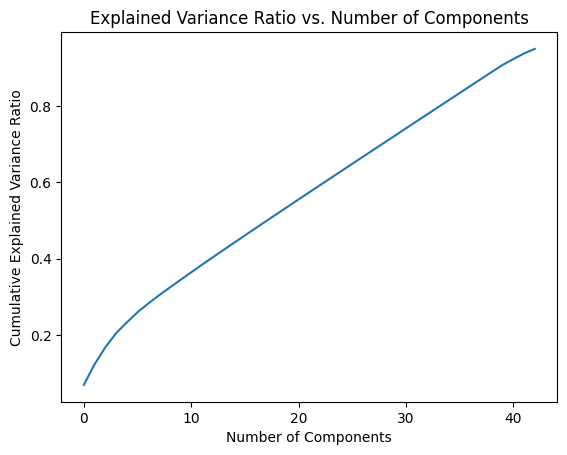

In [3]:
# Combine Wilderness_Area and Soil_Type columns
wilderness_cols = [col for col in train_data.columns if col.startswith('Wilderness_Area')]
soil_type_cols = [col for col in train_data.columns if col.startswith('Soil_Type')]

train_data['Wilderness_Area'] = train_data[wilderness_cols].idxmax(axis=1)
train_data['Soil_Type'] = train_data[soil_type_cols].idxmax(axis=1)

test_data['Wilderness_Area'] = test_data[wilderness_cols].idxmax(axis=1)
test_data['Soil_Type'] = test_data[soil_type_cols].idxmax(axis=1)

# Drop original binary columns
train_data = train_data.drop(wilderness_cols + soil_type_cols, axis=1)
test_data = test_data.drop(wilderness_cols + soil_type_cols, axis=1)

# Separate features and target
X = train_data.drop(['id', 'label'], axis=1)
y = train_data['label']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Wilderness_Area', 'Soil_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualize the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


Logistic Regression:
Macro F1-score: 0.5276129407619744
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     33990
           2       0.75      0.80      0.77     45400
           3       0.68      0.81      0.74      5664
           4       0.65      0.44      0.52       427
           5       0.11      0.00      0.01      1525
           6       0.48      0.23      0.31      2695
           7       0.72      0.58      0.64      3261

    accuracy                           0.72     92962
   macro avg       0.58      0.51      0.53     92962
weighted avg       0.71      0.72      0.71     92962


SVM:
Macro F1-score: 0.5828859508558729
              precision    recall  f1-score   support

           1       0.78      0.74      0.76     33990
           2       0.78      0.84      0.81     45400
           3       0.71      0.88      0.78      5664
           4       0.70      0.25      0.36       427
           5       0.80      0.08 

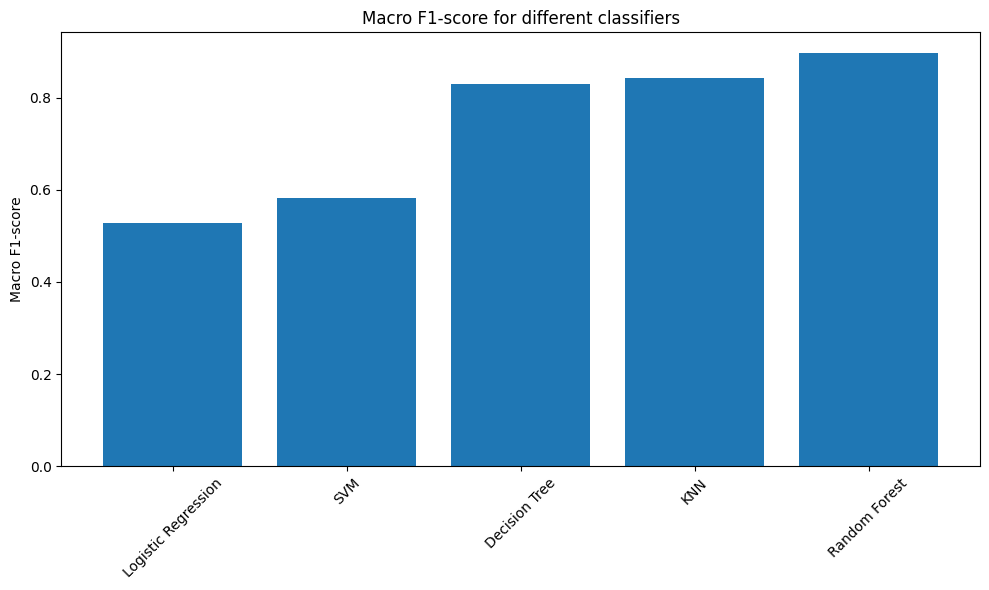

In [4]:


# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1)
}

results = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = macro_f1
    print(f'\n{name}:')
    print(f'Macro F1-score: {macro_f1}')
    print(classification_report(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Macro F1-score for different classifiers')
plt.ylabel('Macro F1-score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:


# Use the best model for final predictions
best_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
best_model.fit(X_train_pca, y_train)

# Prepare the test data
X_test_final = pd.get_dummies(test_data.drop('id', axis=1), columns=['Wilderness_Area', 'Soil_Type'])
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)  # Ensure all columns are present
X_test_final_scaled = scaler.transform(X_test_final)
X_test_final_pca = pca.transform(X_test_final_scaled)

# Make predictions
test_predictions = best_model.predict(X_test_final_pca)

# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 'label': test_predictions})
submission.to_csv('../data/raw/forest-cover-type-prediction-summer-2024/submission.csv', index=False)
print("Submission file created!")


Submission file created!
